# Wi-Fi Fingerprinting

In [4]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits import mplot3d

import LinearRegressionUsingGD
import KNN
import kMeans

from sklearn.linear_model import Lasso

In [5]:
train_records = pd.read_csv("trainingData.csv")
test_records = pd.read_csv("validationData.csv")

## Statistics of Data

In [6]:
train_records.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [7]:
train_records.shape

(19937, 529)

In [8]:
train_records.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


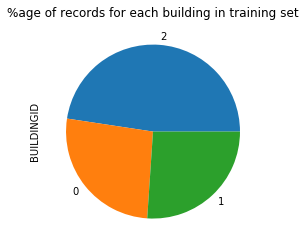

In [9]:
train_records.BUILDINGID.value_counts().plot(kind='pie',title='%age of records for each building in training set')

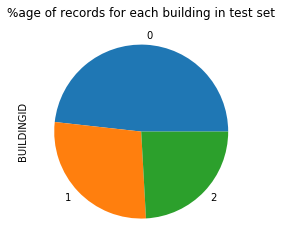

In [10]:
test_records.BUILDINGID.value_counts().plot(kind='pie',title='%age of records for each building in test set')

In [11]:
y_train_long = train_records["LONGITUDE"].values
y_train_lat = train_records["LATITUDE"].values
y_train_floor = train_records["FLOOR"].values
y_train_building = train_records["BUILDINGID"].values

y_test_long = test_records["LONGITUDE"].values
y_test_lat = test_records["LATITUDE"].values
y_test_floor = test_records["FLOOR"].values
y_test_building = test_records["BUILDINGID"].values

In [12]:
y_train_long_lat = pd.concat([train_records["LONGITUDE"],train_records["LATITUDE"]],axis=1)
y_test_long_lat = pd.concat([test_records["LONGITUDE"],test_records["LATITUDE"]],axis=1)
y_test_long_lat = y_test_long_lat.values

In [13]:
# drop the output labels
cols = train_records.columns[520:]
train_records = train_records.drop(columns=cols)
test_records = test_records.drop(columns=cols)
train_records.shape,test_records.shape

((19937, 520), (1111, 520))

In [14]:
# remove the WAPs with standard deviation of zero
cols = train_records.std()[train_records.std() == 0].index.values
train_records = train_records.drop(cols, axis=1)
test_records = test_records.drop(cols, axis=1)
train_records.shape,test_records.shape

((19937, 465), (1111, 465))

In [15]:
attributes = train_records.columns
train_records = train_records.values
test_records = test_records.values
train_records.shape,test_records.shape

((19937, 465), (1111, 465))

In [16]:
# check for null values
print(np.isnan(train_records).any())
print(np.isnan(test_records).any())

False
False


## Data Visualisation

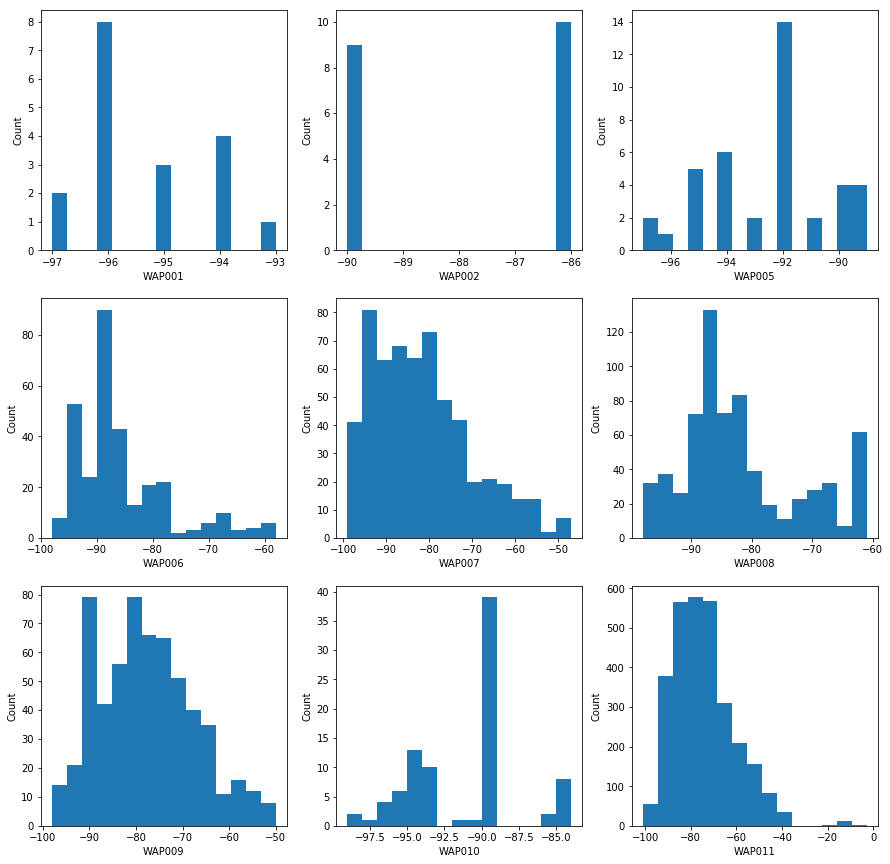

In [17]:
# histograms of WAPs showing distribution of signal strength
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        x = list(filter(lambda x : x!=100,train_records[:,i*3+j]))
        ax[i,j].hist(x, bins=15)
        ax[i,j].set(xlabel=attributes[i*3+j], ylabel="Count")

## Data Pre-processing

In [18]:
# replace 100 with -115 for better scaling
train_records[train_records==100] = -115
test_records[test_records==100] = -115

## Structure of the testbed

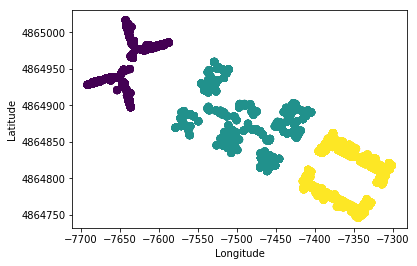

In [19]:
# 2D plot
plt.scatter(y_train_long,y_train_lat, s=50, c=y_train_building, cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

[Text(0.5, 0, 'Floor'), Text(0.5, 0, 'Latitude'), Text(0.5, 0, 'Longitude')]

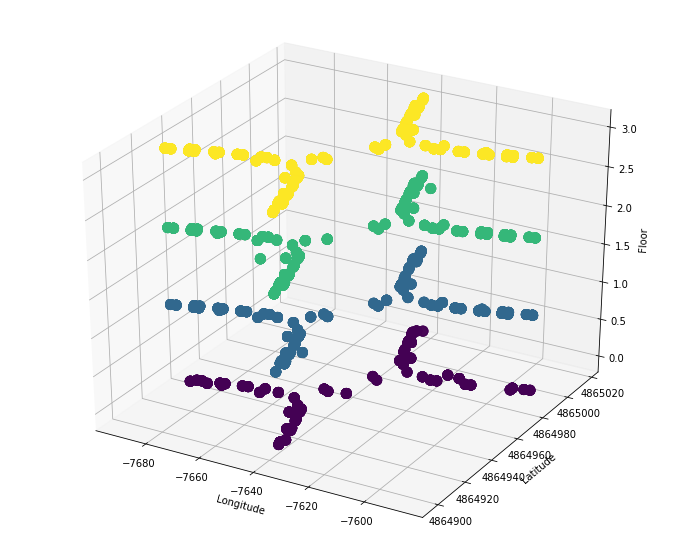

In [20]:
# 3D plots
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_train_long[y_train_building==0],y_train_lat[y_train_building==0],y_train_floor[y_train_building==0], s=100, c=y_train_floor[y_train_building==0], cmap='viridis')
ax.set(xlabel="Longitude", ylabel="Latitude", zlabel="Floor")

[Text(0.5, 0, 'Floor'), Text(0.5, 0, 'Latitude'), Text(0.5, 0, 'Longitude')]

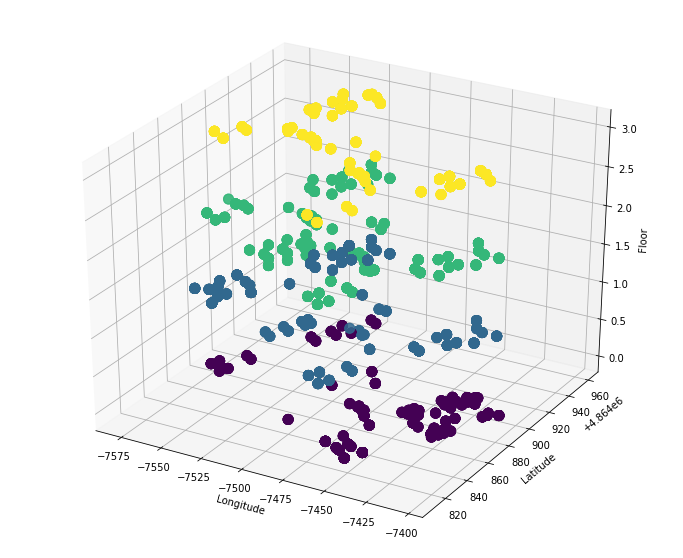

In [21]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_train_long[y_train_building==1],y_train_lat[y_train_building==1],y_train_floor[y_train_building==1], s=100, c=y_train_floor[y_train_building==1], cmap='viridis')
ax.set(xlabel="Longitude", ylabel="Latitude", zlabel="Floor")

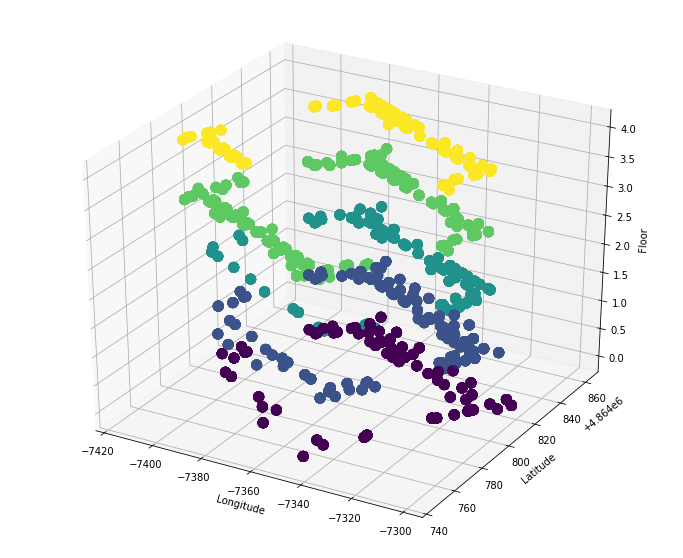

In [22]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_train_long[y_train_building==2],y_train_lat[y_train_building==2],y_train_floor[y_train_building==2], s=100, c=y_train_floor[y_train_building==2], cmap='viridis')
ax.set(xlabel="Longitude", ylabel="Latitude", zlabel="Floor")
from sklearn.linear_model import LinearRegression

## Fitting ML models

In [23]:
model = LinearRegression()
model.fit(train_records, y_train_lat)
y_pred_lat = model.predict(test_records)
model.fit(train_records, y_train_long)
y_pred_long = model.predict(test_records)
error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
print(sum(error)/1000)
cs_lr = np.cumsum(error)

53.953438147376005


In [24]:
model = Lasso()
model.fit(train_records, y_train_lat)
y_pred_lat = model.predict(test_records)
model.fit(train_records, y_train_long)
y_pred_long = model.predict(test_records)
error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
print(sum(error)/1000)
cs_lasso = np.cumsum(error)

50.80159904346127


In [25]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)
model.fit(train_records, y_train_lat)
y_pred_lat=model.predict(test_records)
model.fit(train_records, y_train_long)
y_pred_long=model.predict(test_records)
error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
err = sum(error)
print(err/1000)
cs_knn = np.cumsum(error)
k_values = []
k_values.append(err/1000)

12.50468000486502


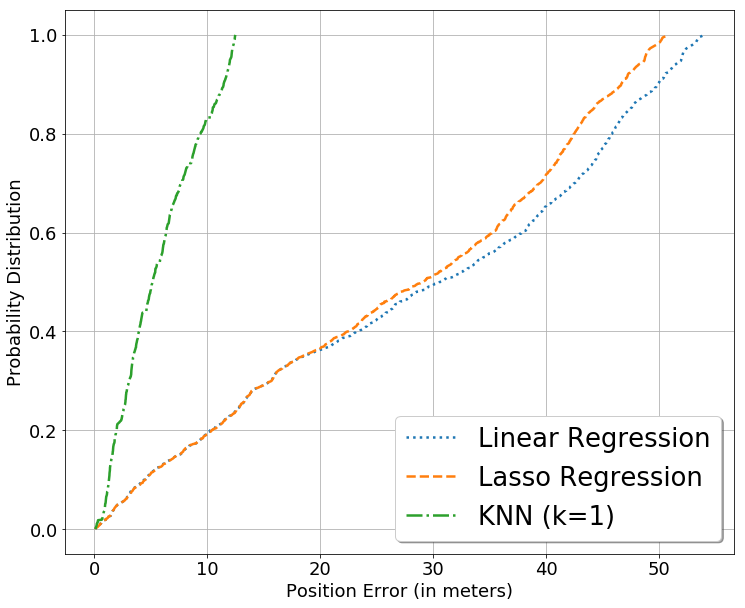

In [26]:
y1 = np.arange(0,1111)
fig = plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 18})
ax = fig.add_subplot(111)
ax.plot(cs_lr/1000,y1/1110, label='Linear Regression', ls=':', lw=2.5)
ax.plot(cs_lasso/1000,y1/1110, label='Lasso Regression', ls='--', lw=2.5)
ax.plot(cs_knn/1000,y1/1110, label='KNN (k=1)', ls='-.', lw=2.5)
ax.set(xlabel="Position Error (in meters)", ylabel="Probability Distribution")
ax.legend(shadow=True, fontsize='x-large')
ax.grid()

In [27]:
# optimising value of k
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,51,2):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(train_records, y_train_lat)
    y_pred_lat=model.predict(test_records)
    model.fit(train_records, y_train_long)
    y_pred_long=model.predict(test_records)
    error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
    err = sum(error)
    print(err/1000)
    k_values.append(err/1000)

11.157840864098187
11.04073329113878
11.118749569536222
11.200367277553935
11.216562104738763
11.21154527237878
11.299143392723117
11.333944722250632
11.440622356538496
11.533899374199983
11.592846915862689
11.582702907603158
11.709796728820518
11.925060698908716
11.975197490619804
12.051909218598915
12.231582324204735
12.341414816108687
12.466964560872139
12.529767459170683
12.666339739626764
12.773135682028876
12.8472029659885
12.957684409807472


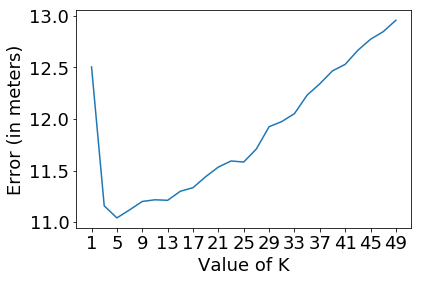

In [42]:
ran = [1]
ran.extend(np.arange(3,50,2))
plt.plot(ran,k_values)
plt.xticks(np.arange(1,50,4))
plt.xlabel('Value of K')
plt.ylabel('Error (in meters)')
plt.show()

In [29]:
# predictions with optimal value of K
model = KNeighborsRegressor(n_neighbors=5)
model.fit(train_records, y_train_lat)
y_pred_lat_best=model.predict(test_records)
model.fit(train_records, y_train_long)
y_pred_long_best=model.predict(test_records)
error = ((y_pred_long_best-y_test_long)**2 + (y_pred_lat_best-y_test_lat)**2)**0.5
print(sum(error)/1000)
cs_knn_best = np.cumsum(error)

11.04073329113878


In [30]:
# predictions with worst value of K
model = KNeighborsRegressor(n_neighbors=49)
model.fit(train_records, y_train_lat)
y_pred_lat=model.predict(test_records)
model.fit(train_records, y_train_long)
y_pred_long=model.predict(test_records)
error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
print(sum(error)/1000)
cs_knn_worst = np.cumsum(error)

12.957684409807472


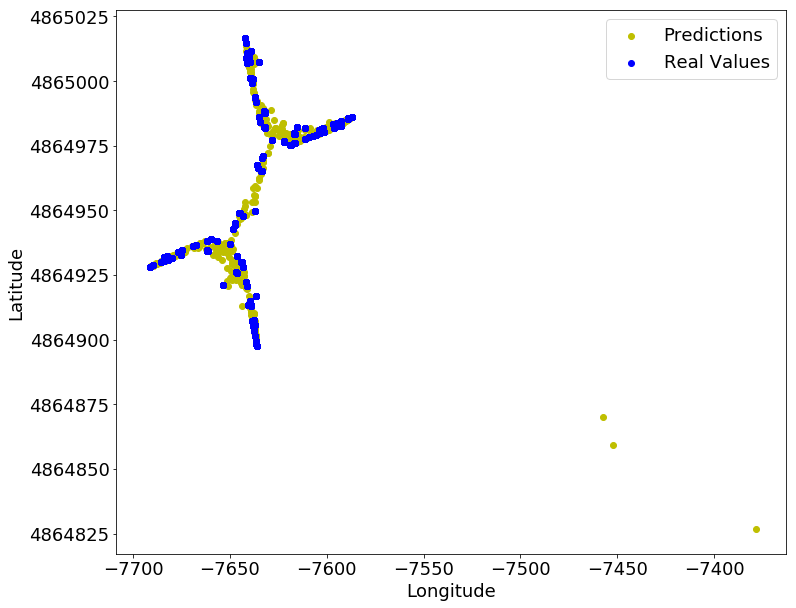

In [31]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(y_pred_long_best[y_test_building==0],y_pred_lat_best[y_test_building==0],  c='y', label='Predictions')
ax.scatter(y_train_long[y_train_building==0],y_train_lat[y_train_building==0],  c='b', label='Real Values')
ax.set(xlabel="Longitude", ylabel="Latitude")
ax.legend()

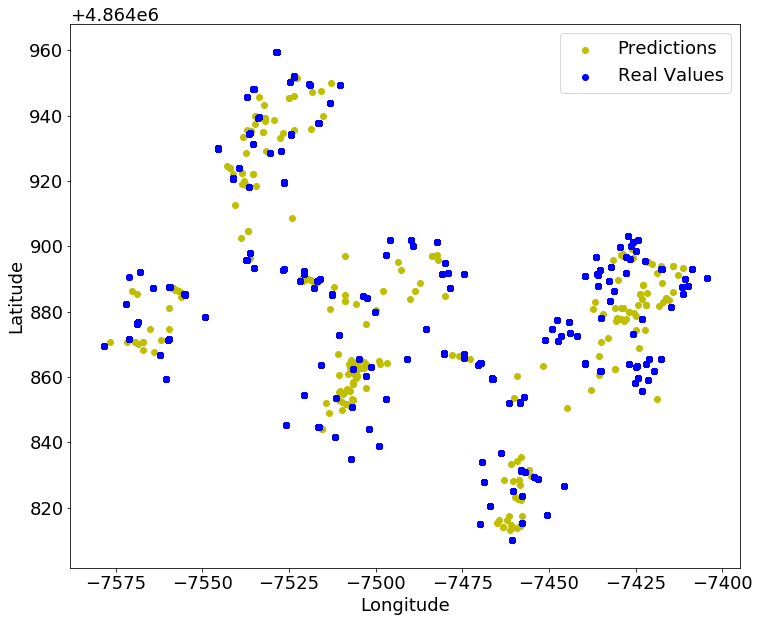

In [32]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(y_pred_long_best[y_test_building==1],y_pred_lat_best[y_test_building==1],  c='y', label='Predictions')
ax.scatter(y_train_long[y_train_building==1],y_train_lat[y_train_building==1],  c='b', label='Real Values')
ax.set(xlabel="Longitude", ylabel="Latitude")
ax.legend()

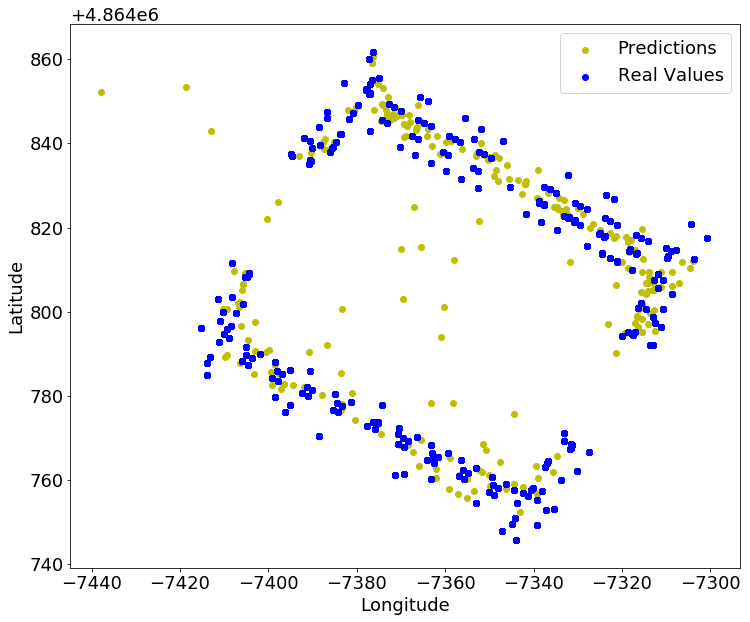

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

ax.scatter(y_pred_long_best[y_test_building==2],y_pred_lat_best[y_test_building==2],  c='y', label='Predictions')
ax.scatter(y_train_long[y_train_building==2],y_train_lat[y_train_building==2],  c='b', label='Real Values')
ax.set(xlabel="Longitude", ylabel="Latitude")
ax.legend()

In [34]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_records, y_train_floor)
y_pred_floor = model.predict(test_records)
error = np.mean(y_pred_floor == y_test_floor)
print("Floor accuracy: ",error*100)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_records, y_train_building)
y_pred_building = model.predict(test_records)
error = np.mean(y_pred_building == y_test_building)
print("Building accuracy: ",error*100)

Floor accuracy:  88.02880288028803
Building accuracy:  99.36993699369937


In [35]:
from sklearn.cluster import KMeans
def dist(a,b):
    _sum = 0
    #print(a.shape,b.shape)
    for i in range(a.shape[0]):
        #print('x=',a[0,i],'y',b[0,i])
        _sum += (a[0,i] - b[0,i])**2
    return _sum**0.5

def nearest_centroid(cen, point):
    min_d = dist(cen[0:1,:],point)
    pos = 0
    for i in range(1,cen.shape[0]):
        d2 = dist(cen[i:i+1,:],point)
        if d2 < min_d:
            min_d = d2
            pos = i
    return pos

## KNN with clustering

In [36]:
clusters = 49
kmeans = KMeans(n_clusters=clusters, random_state=5, init='k-means++').fit(y_train_long_lat)
centers = kmeans.cluster_centers_

[Text(0, 0.5, 'Latitude'), Text(0.5, 0, 'Longitude')]

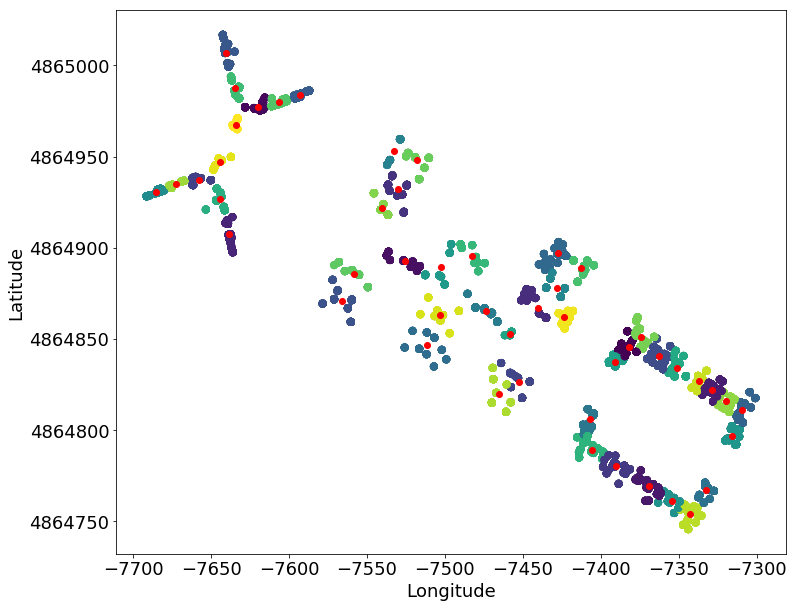

In [37]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.scatter(y_train_long,y_train_lat, s=50, c=kmeans.labels_, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='red');
ax.set(xlabel="Longitude", ylabel="Latitude")

In [38]:
cnt = 0
y_test_index = []
for i in range(1111):
    y_cluster= kmeans.predict(y_test_long_lat[i:i+1,:])
    y_test_index.append(int(y_cluster))
    y_ll = nearest_centroid(centers,y_test_long_lat[i:i+1,:])
    if y_cluster==y_ll:
        cnt += 1
print(cnt/1111)
y_test_index = np.asarray(y_test_index)

0.6093609360936093


In [39]:
err_kmeans =[]
for j in range(3,50,2):
    #clusters = 50
    kmeans = KMeans(n_clusters=j, random_state=5, init='k-means++').fit(y_train_long_lat)
    centers = kmeans.cluster_centers_
    cnt = 0
    y_test_index = []
    for i in range(1111):
        y_cluster= kmeans.predict(y_test_long_lat[i:i+1,:])
        y_test_index.append(int(y_cluster))
        y_ll = nearest_centroid(centers,y_test_long_lat[i:i+1,:])
        if y_cluster==y_ll:
            cnt += 1
    print(cnt/1111)
    y_test_index = np.asarray(y_test_index)
    error = []
    for i in range(j):
        train_records_i = train_records[kmeans.labels_==i]
        y_train_long_i = y_train_long[kmeans.labels_==i]
        y_train_lat_i = y_train_lat[kmeans.labels_==i]

        test_records_i = test_records[y_test_index==i]
        y_test_long_i = y_test_long[y_test_index==i]
        y_test_lat_i = y_test_lat[y_test_index==i]

        model = KNeighborsRegressor(n_neighbors=5)
        model.fit(train_records_i, y_train_lat_i)
        y_pred_lat_i=model.predict(test_records_i)
        model.fit(train_records_i, y_train_long_i)
        y_pred_long_i=model.predict(test_records_i)
        error_i = ((y_pred_long_i-y_test_long_i)**2 + (y_pred_lat_i-y_test_lat_i)**2)**0.5
        #print(sum(error_i)/1000)
        error = np.concatenate((error,error_i),axis=0)
    err_kmeans.append(sum(error)/1000)
    print(sum(error)/1000)
    cs_knn_clust = np.cumsum(error)

0.9792979297929792
10.164764507522412
0.9612961296129613
9.331671885045795
0.8244824482448245
9.139836548560844
0.72997299729973
8.97547341843874
0.7929792979297929
9.097893250336815
0.8073807380738074
8.640777080572164
0.810981098109811
8.277756184827592
0.7110711071107111
7.8165932091582295
0.7596759675967597
7.899281715355262
0.7497749774977498
7.770204307787106
0.7092709270927092
7.090671495831138
0.7065706570657065
6.983214559899162
0.7164716471647165
6.790308789132907
0.7524752475247525
6.212700639059481
0.7020702070207021
6.184546288529104
0.6795679567956796
6.258060326772871
0.6993699369936993
5.9867615017886955
0.684068406840684
5.942258843730964
0.6642664266426642
5.596284535795969
0.6804680468046804
5.659193830556783
0.6111611161116112
5.544484406390584
0.6201620162016201
5.324110044893622
0.648064806480648
5.016193922673824
0.6093609360936093
4.992344176247091


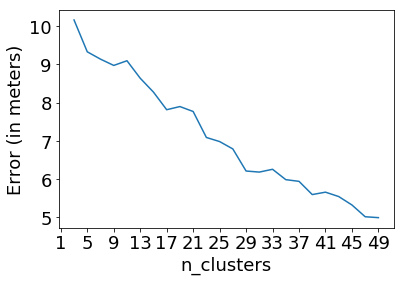

In [40]:
#ran.extend(np.arange(3,50,2))
plt.plot(np.arange(3,50,2),err_kmeans)
plt.xlabel('n_clusters')
plt.ylabel('Error (in meters)')

plt.xticks(np.arange(1,50,4))
#labels
plt.show()

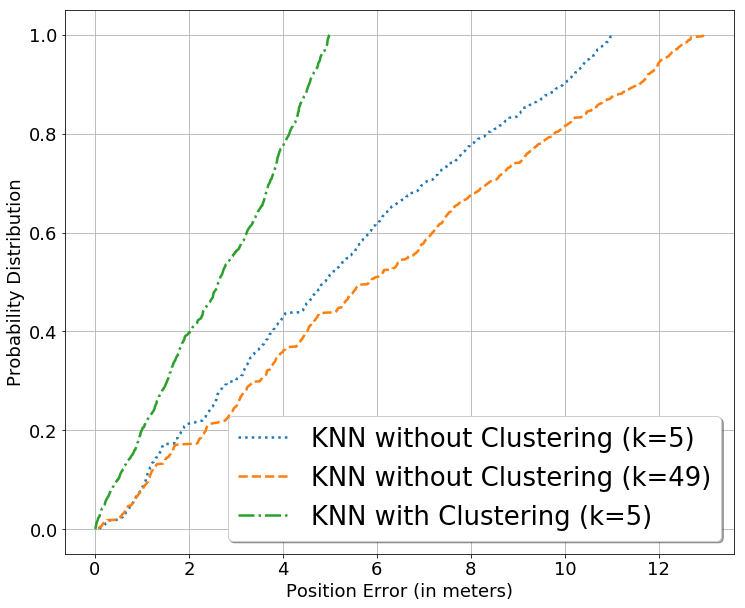

In [41]:
y1 = np.arange(0,1111)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.plot(cs_knn_best/1000,y1/1110, label='KNN without Clustering (k=5)', ls=':', lw=2.5)
ax.plot(cs_knn_worst/1000,y1/1110, label='KNN without Clustering (k=49)', ls='--', lw=2.5)
ax.plot(cs_knn_clust/1000,y1/1110, label='KNN with Clustering (k=5)', ls='-.', lw=2.5)
ax.set(xlabel="Position Error (in meters)", ylabel="Probability Distribution")
ax.legend(shadow=True, fontsize='x-large')
ax.grid()